# ATMO656A Spring 2024 - Homework 4

Edgardo I. Sepulveda Araya

Importing libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# My favorite colors for figures:
custom_colors = [(6/255, 33/255, 92/255), (176/255, 35/255, 24/255),
                 (229/255, 179/255, 69/255), (131/255, 170/255, 69/255),
                 (116/255, 24/255, 123/255), (202/255, 91/255, 46/255),
                 (107/255, 188/255, 233/255), 'grey', 'black'] 

Reading absorption cross-section $\sigma_{abs}$ $(cm^{2}/\text{molecule})$ data set:

In [4]:
sigma = pd.read_excel('HW4_xsect_corr.xls')

### 1. Retrieving probabilty distribution function

In [36]:
logs = np.log10(sigma['sigma (cm2/molec)'])
hist, bin_edges = np.histogram(logs, bins = 100)
hist

array([26, 48, 47, 44, 57, 40, 28, 20, 28, 29, 21, 27, 17, 14, 12, 21, 33,
       29, 40, 34, 25, 20, 20, 21, 18, 20, 13, 14, 11, 14, 17, 63, 53, 37,
       43, 37, 68, 63, 62, 49, 48, 36, 29, 29, 24, 24, 26, 32, 30, 30, 22,
       25, 24, 21, 24, 15, 18, 18, 15, 15, 18, 19,  8, 14, 12, 12,  9, 17,
       13, 16, 10, 16, 15, 16, 11, 10, 12, 14,  6, 11, 10,  7,  9,  6,  9,
        9,  6, 12, 10,  8,  2,  6,  3,  5,  4,  1,  5,  5,  2,  9])

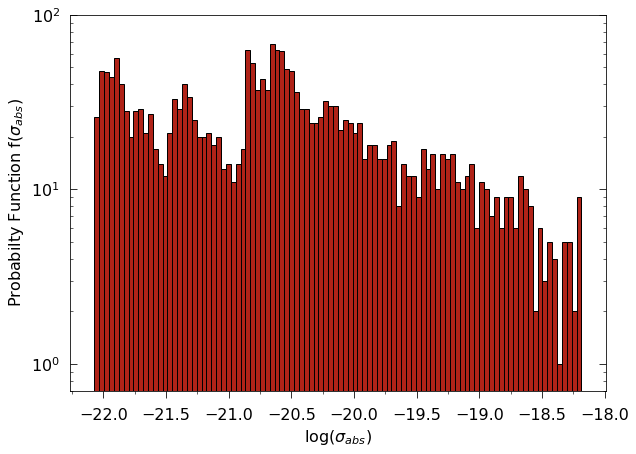

In [37]:
fontsize1 = 16 
flength   = 12
f, ax     = plt.subplots(figsize = (flength, flength * 0.5), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.08, right = 0.7)

handles = []
labels  = []

h1 = ax.hist(logs, bins = 100, log = True,
             color = custom_colors[1], alpha = 1, edgecolor = 'black')

# X Axis:
ax.set_xlabel('log($\sigma_{abs}$)', fontsize = fontsize1, color = 'black', labelpad = 5)
#ax.set_xlim(-.9, -.1)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'out', 
               top = False, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 3, direction = 'out', 
               top = False, labelsize = fontsize1, pad = 10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.25))

# Y Axis:
ax.set_ylabel(r'Probabilty Function f($\sigma_{abs}$)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(7e-1, 100)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 3, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(.2))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

# LEGEND:
# legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
#                     handlelength = 1, handletextpad = .4, labelspacing = .5,
#                     columnspacing = .5, numpoints = 1, frameon = False,
#                     prop = {'size': fontsize1})

# ADDITIONAL TEXT:
# ax.text(0.95, 0.95, r'$\omega_0$ = '+str(w_0)+'\n'+'g = '+str(g)+'\n'+r'$\tau$ = '+str(4), fontsize = fontsize1+10, fontweight = 'bold',
#         color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)

### 2. Retrieving Cumulative Distribution Function

In [74]:
cumulative = np.cumsum(hist)
g          = cumulative/cumulative.max()

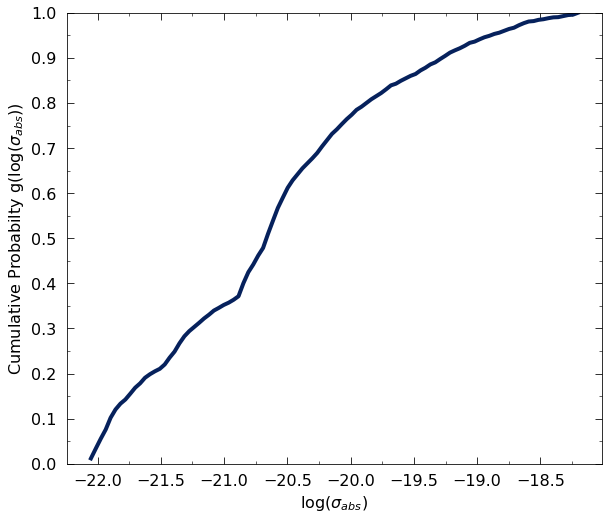

In [62]:
fontsize1 = 16 
flength   = 12
f, ax     = plt.subplots(figsize = (flength, flength * 0.6), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.08, right = 0.7)

handles = []
labels  = []

center_of_bin = (bin_edges[:-1] + bin_edges[1:])/2 # center of the bin computed as the average

h1 = ax.plot(center_of_bin, g, 
             linestyle = 'solid', linewidth = 4,
             color = custom_colors[0], alpha = 1)

# X Axis:
ax.set_xlabel('log($\sigma_{abs}$)', fontsize = fontsize1, color = 'black', labelpad = 5)
#ax.set_xlim(-.9, -.1)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 3, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.25))

# Y Axis:
ax.set_ylabel(r'Cumulative Probabilty g(log($\sigma_{abs}$))', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 3, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.05))

# LEGEND:
# legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
#                     handlelength = 1, handletextpad = .4, labelspacing = .5,
#                     columnspacing = .5, numpoints = 1, frameon = False,
#                     prop = {'size': fontsize1})

# ADDITIONAL TEXT:
# ax.text(0.95, 0.95, r'$\omega_0$ = '+str(w_0)+'\n'+'g = '+str(g)+'\n'+r'$\tau$ = '+str(4), fontsize = fontsize1+10, fontweight = 'bold',
#         color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)

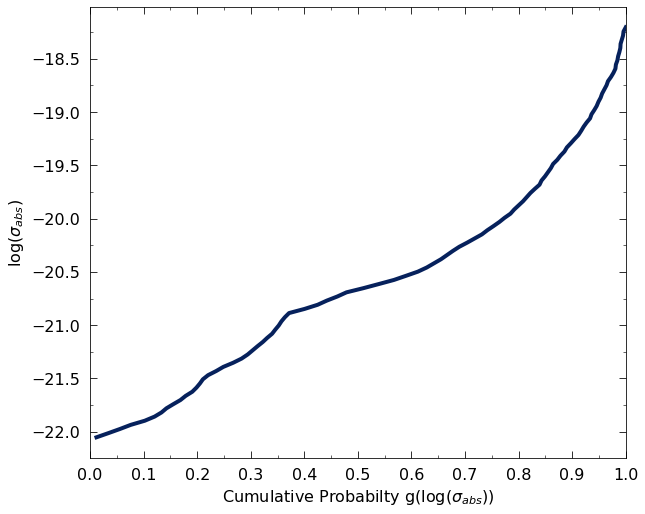

In [56]:
fontsize1 = 16 
flength   = 12
f, ax     = plt.subplots(figsize = (flength, flength * 0.6), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.08, right = 0.7)

handles = []
labels  = []

center_of_bin = (bin_edges[:-1] + bin_edges[1:])/2 # center of the bin computed as the average

h1 = ax.plot(g, center_of_bin, 
             linestyle = 'solid', linewidth = 4,
             color = custom_colors[0], alpha = 1)

# X Axis:
ax.set_xlabel(r'Cumulative Probabilty g(log($\sigma_{abs}$))', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xlim(0, 1)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 3, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.05))

# Y Axis:
ax.set_ylabel('log($\sigma_{abs}$)', fontsize = fontsize1, color = 'black', labelpad = 5)
#ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 3, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.25))

# LEGEND:
# legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
#                     handlelength = 1, handletextpad = .4, labelspacing = .5,
#                     columnspacing = .5, numpoints = 1, frameon = False,
#                     prop = {'size': fontsize1})

# ADDITIONAL TEXT:
# ax.text(0.95, 0.95, r'$\omega_0$ = '+str(w_0)+'\n'+'g = '+str(g)+'\n'+r'$\tau$ = '+str(4), fontsize = fontsize1+10, fontweight = 'bold',
#         color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)

### 3. Comparing LBL, Sort distribution and Quadrature Method

Defining array for number of water molecules (absorber) at the path (molecules / cm2):

In [57]:
u = np.logspace(17, 23, num = 100) # molecules / cm2

#### Line-by-line calculation

In [58]:
kv = sigma['sigma (cm2/molec)']
wn = sigma['wavenumber (cm-1)']

In [59]:
T_LBL = []
Dv    = wn.max() - wn.min()
for ui in u: # Calculating transmission for each column value
    T_LBLi = 0
    for i in range(len(wn)-1): # Integrating spectral absorption
        T_LBLi += np.exp(-kv[i]*ui)*(wn[i+1]-wn[i])
    T_LBL.append(T_LBLi*(1/Dv))

#### Sort Distribution calculation

In [64]:
T_sort    = []
total_pdf = sum(hist)
for ui in u: # Calculating transmission for each column value
    T_sorti = 0
    for i in range(100): # Integrating PDF of 100 bins from spectral absorption
        logki         = 10**center_of_bin[i]
        pdfi          = hist[i]/total_pdf
        T_sorti       += np.exp(-logki*ui)*pdfi
    T_sort.append(T_sorti)

#### Quadrature of cumulative frequency distribution

In [81]:
quad_points = [3, 5, 7, 10, 15, 50, 100]
for quadi in quad_points:
    globals()['T_quad'+str(quadi)] = []
    Dg = 1/quadi
    for ui in u: # Calculating transmission for each column value
        T_quadi = 0
        for i in range(quadi): # Integrating k(g) (from CDF)
            logki         = 10**center_of_bin[int(Dg*i*len(g))]
            T_quadi       += np.exp(-logki*ui)*Dg
        eval('T_quad'+str(quadi)).append(T_quadi)

### Average band transmission Comparison

Text(0.95, 0.95, 'Average Band\nTransmission')

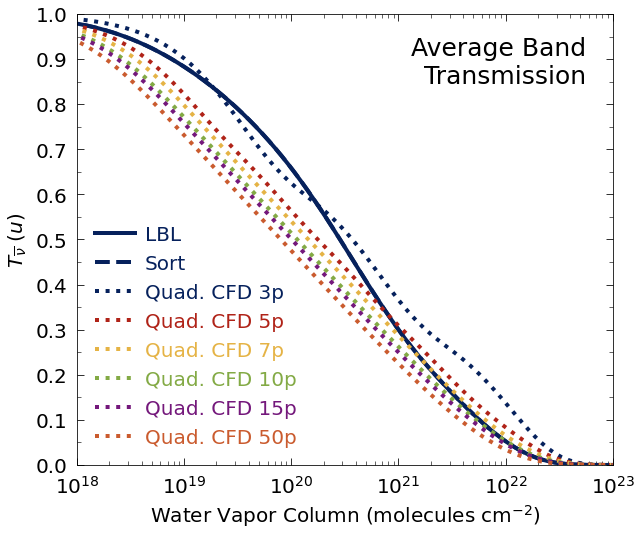

In [84]:
fontsize1 = 20 
flength   = 12
f, ax     = plt.subplots(figsize = (flength, flength * 0.6), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.08, right = 0.7)

h1 = ax.plot(u, T_LBL, color = custom_colors[0], alpha = 1, linestyle = 'solid', linewidth = 4)
h2 = ax.plot(u, T_sort, color = custom_colors[0], alpha = 1, linestyle = 'dashed', linewidth = 4)
h3 = ax.plot(u, T_quad3, color = custom_colors[0], alpha = 1, linestyle = 'dotted', linewidth = 4)
h4 = ax.plot(u, T_quad5, color = custom_colors[1], alpha = 1, linestyle = 'dotted', linewidth = 4)
h5 = ax.plot(u, T_quad7, color = custom_colors[2], alpha = 1, linestyle = 'dotted', linewidth = 4)
h6 = ax.plot(u, T_quad10, color = custom_colors[3], alpha = 1, linestyle = 'dotted', linewidth = 4)
h7 = ax.plot(u, T_quad15, color = custom_colors[4], alpha = 1, linestyle = 'dotted', linewidth = 4)
h8 = ax.plot(u, T_quad50, color = custom_colors[5], alpha = 1, linestyle = 'dotted', linewidth = 4)
#h8 = ax.plot(u, T_quad100, color = custom_colors[6], alpha = 1, linestyle = 'dotted', linewidth = 4)
handles = h1 + h2 + h3 + h4 + h5 + h6 + h7 + h8
labels  = ['LBL', 'Sort', 'Quad. CFD 3p', 'Quad. CFD 5p', 'Quad. CFD 7p', 'Quad. CFD 10p', 'Quad. CFD 15p', 'Quad. CFD 50p']

# X Axis:
ax.set_xlabel(r'Water Vapor Column (molecules cm$^{-2}$)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xscale('log')
ax.set_xlim(1e18, 1e23)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 4, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(.2))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(.05))

# Y Axis:
ax.set_ylabel(r'$T_{\overline{\nu}}$ $(u)$', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(0, 1)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 4, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.05))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'lower left', ncol = 1,
                    handlelength = 2, handletextpad = .5, labelspacing = .5,
                    frameon = False, #numpoints = 1, columnspacing = .5
                    labelcolor = 'linecolor', prop = {'size': fontsize1})

# ADDITIONAL TEXT:
ax.text(0.95, 0.95, 'Average Band'+'\n'+'Transmission', fontsize = fontsize1+5, fontweight = 'normal',
        color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)

In [85]:
D_sort   = (np.array(T_sort) - np.array(T_LBL))/np.array(T_LBL) * 100
D_quad3  = (np.array(T_quad3) - np.array(T_LBL))/np.array(T_LBL) * 100
D_quad5  = (np.array(T_quad5) - np.array(T_LBL))/np.array(T_LBL) * 100
D_quad7  = (np.array(T_quad7) - np.array(T_LBL))/np.array(T_LBL) * 100
D_quad10 = (np.array(T_quad10) - np.array(T_LBL))/np.array(T_LBL) * 100
D_quad15 = (np.array(T_quad15) - np.array(T_LBL))/np.array(T_LBL) * 100
D_quad50 = (np.array(T_quad15) - np.array(T_LBL))/np.array(T_LBL) * 100

Text(0.5, 1.0, 'Transmission Difference r/ to LBL')

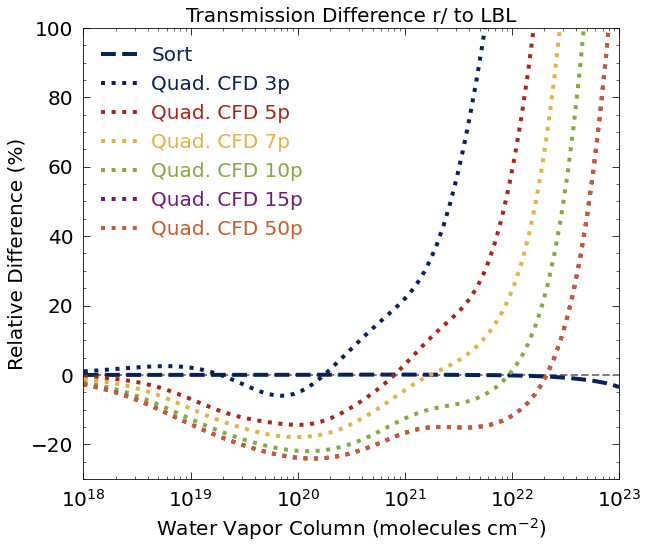

In [95]:
fontsize1 = 20 
flength   = 12
f, ax     = plt.subplots(figsize = (flength, flength * 0.6), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.08, right = 0.7)

h1 = ax.axhline(y = 0, color = 'grey', linestyle = 'dashed', linewidth = 2)
h2 = ax.plot(u, D_sort, color = custom_colors[0], alpha = 1, linestyle = 'dashed', linewidth = 4)
h3 = ax.plot(u, D_quad3, color = custom_colors[0], alpha = 1, linestyle = 'dotted', linewidth = 4)
h4 = ax.plot(u, D_quad5, color = custom_colors[1], alpha = 1, linestyle = 'dotted', linewidth = 4)
h5 = ax.plot(u, D_quad7, color = custom_colors[2], alpha = 1, linestyle = 'dotted', linewidth = 4)
h6 = ax.plot(u, D_quad10, color = custom_colors[3], alpha = 1, linestyle = 'dotted', linewidth = 4)
h7 = ax.plot(u, D_quad15, color = custom_colors[4], alpha = 1, linestyle = 'dotted', linewidth = 4)
h8 = ax.plot(u, D_quad50, color = custom_colors[5], alpha = 1, linestyle = 'dotted', linewidth = 4)
#h8 = ax.plot(u, T_quad100, color = custom_colors[6], alpha = 1, linestyle = 'dotted', linewidth = 4)
handles = h2 + h3 + h4 + h5 + h6 + h7 + h8
labels  = ['Sort', 'Quad. CFD 3p', 'Quad. CFD 5p', 'Quad. CFD 7p', 'Quad. CFD 10p', 'Quad. CFD 15p', 'Quad. CFD 50p']

# X Axis:
ax.set_xlabel(r'Water Vapor Column (molecules cm$^{-2}$)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_xscale('log')
ax.set_xlim(1e18, 1e23)
ax.tick_params(axis = 'x', which = 'major', color = 'black', size = 7, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'x', which = 'minor', color = 'black', size = 3, direction = 'in', 
               top = True, labelsize = fontsize1, pad = 10)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(.2))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(.05))

# Y Axis:
ax.set_ylabel('Relative Difference (%)', fontsize = fontsize1, color = 'black', labelpad = 5)
ax.set_ylim(-30, 100)
ax.tick_params(axis = 'y', which = 'major', color = 'black', size = 7, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.tick_params(axis = 'y', which = 'minor', color = 'black', size = 3, direction = 'in', 
               right = True, labelsize = fontsize1, pad = 10)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

# LEGEND:
legend  = ax.legend(handles, labels, loc = 'upper left', ncol = 1,
                    handlelength = 2, handletextpad = .5, labelspacing = .5,
                    frameon = False, #numpoints = 1, columnspacing = .5
                    labelcolor = 'linecolor', prop = {'size': fontsize1})

# ADDITIONAL TEXT:
#ax.text(0.95, 0.95, 'Transmission'+'\n'+'Difference', fontsize = fontsize1+5, fontweight = 'normal',
#        color = 'black', ha = 'right', va = 'top', transform = ax.transAxes)
ax.set_title('Transmission Difference r/ to LBL', fontsize = fontsize1, fontweight = 'normal', color = 'black')